In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.metrics import confusion_matrix
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objects as go
#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id", axis=1, inplace=True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


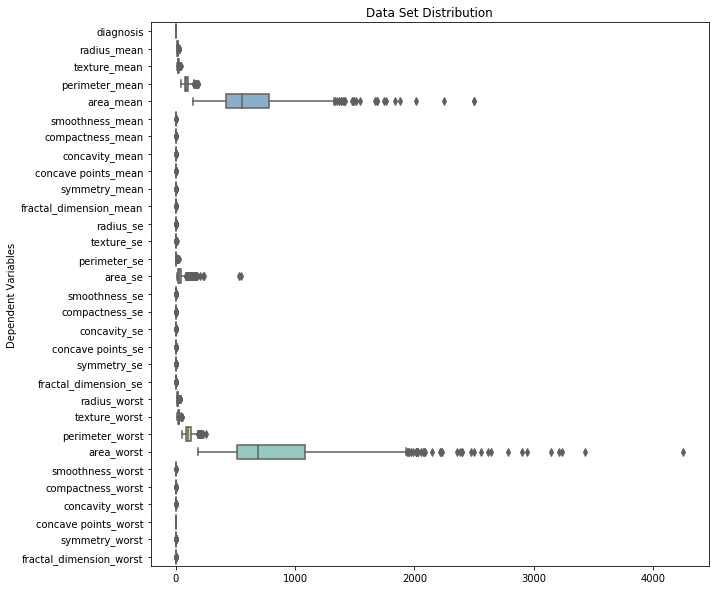

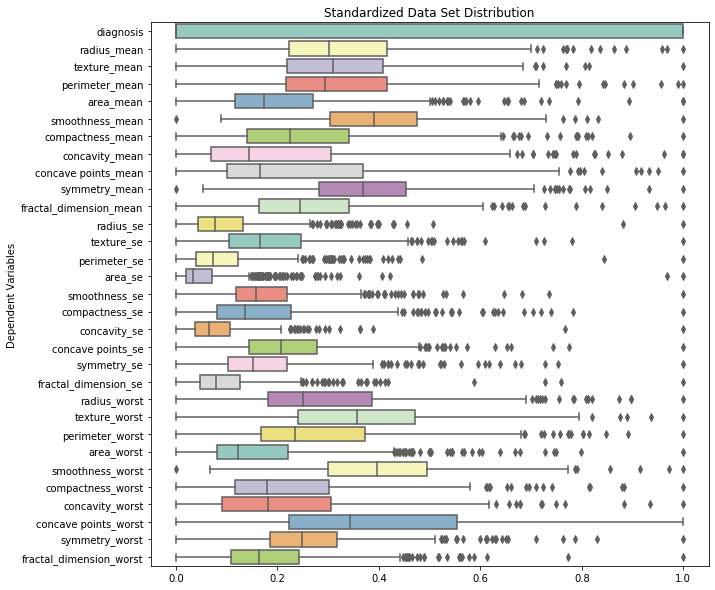

In [7]:
import matplotlib.pyplot as plt
def plot_box_plot(data_frame, data_set_name, xlim=None):
    fig, ax = plt.subplots(figsize=(10, 10))

    #ax.set_axis_bgcolor('#fafafa')
    if xlim is not None:
        plt.xlim(*xlim)
    plt.ylabel('Dependent Variables')
    plt.title("{0}"\
        .format(data_set_name))
    ax = sns.boxplot(data = data_frame,
                     orient = 'h', 
                     palette = 'Set3')
    plt.show()
    plt.close()
    
def normalize_data_frame(data_frame):
    data_frame_norm = pd.DataFrame()
    for col in data_frame:
        if ((len(np.unique(data_frame[col])) > 10) & (data_frame[col].dtype != 'object')):
            data_frame_norm[col]=((data_frame[col] - data_frame[col].min()) /
                                  (data_frame[col].max() - data_frame[col].min()))
        else:
            data_frame_norm[col] = data_frame[col]
    return data_frame_norm

plot_box_plot(data, 
              'Data Set Distribution')

breast_cancer_norm = normalize_data_frame(data)

plot_box_plot(breast_cancer_norm, 
              'Standardized Data Set Distribution')

In [60]:
trace = go.Bar(x = (len(data[(data['diagnosis'] != 0)]), len(data[(data['diagnosis'] == 0)])), y = ['Malignant', 'Benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['red','green']))

layout = dict(title =  'Frequency of Cancer Stages')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

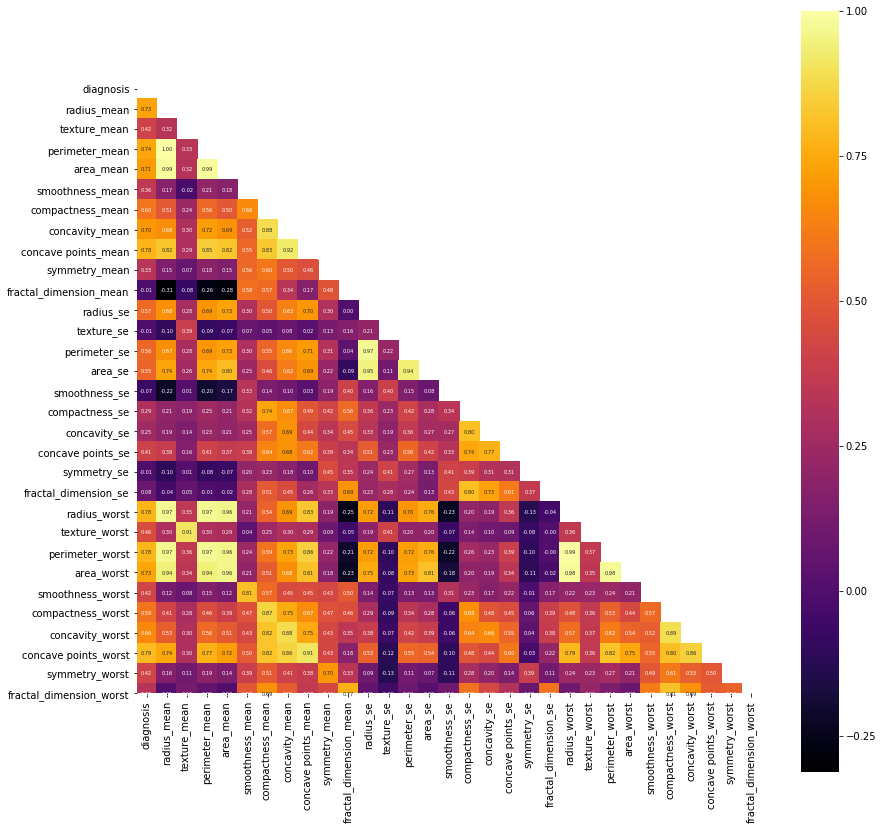

In [8]:
corr = breast_cancer_norm.corr() # .corr is used for find corelation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 5},
           xticklabels= data.columns, yticklabels= data.columns,
           cmap= 'inferno', mask = mask)

In [9]:
cor_target = abs(corr["diagnosis"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [10]:
['perimeter_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']  

['perimeter_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [11]:
malignant = breast_cancer_norm[(breast_cancer_norm['diagnosis'] == 1)]
benign = breast_cancer_norm[(breast_cancer_norm['diagnosis'] == 0)]

In [12]:
def scatterplot_features(feat1, feat2) :  
    trace0 = go.Scatter(
        x = malignant[feat1],
        y = malignant[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = 'red',
                    line = dict(
                    width = 1)))

    trace1 = go.Scatter(
        x = benign[feat1],
        y = benign[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = 'yellow',
                    line = dict(
                    width = 1)))

    layout = dict(
        title = feat1 +" "+"vs"+" "+ feat2,
        yaxis = dict(title = feat2, zeroline = False),
        xaxis = dict(title = feat1, zeroline = False)
    )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [176]:
# positively correlated features
scatterplot_features('radius_mean', 'perimeter_mean')
scatterplot_features('radius_mean', 'area_mean')
scatterplot_features('area_mean', 'perimeter_mean')

scatterplot_features('radius_se', 'perimeter_se')
scatterplot_features('radius_se', 'area_se')
scatterplot_features('area_se', 'perimeter_se')

scatterplot_features('radius_worst', 'perimeter_worst')
scatterplot_features('radius_worst', 'area_worst')
scatterplot_features('area_worst', 'perimeter_worst')

In [13]:
# negatively correlated features <=-0.25
scatterplot_features('radius_worst', 'fractal_dimension_mean')
scatterplot_features('radius_worst', 'smoothness_se')
scatterplot_features('area_worst', 'fractal_dimension_mean')
scatterplot_features('fractal_dimension_mean', 'radius_mean')
scatterplot_features('fractal_dimension_mean', 'perimeter_mean')
scatterplot_features('fractal_dimension_mean', 'area_mean')

In [149]:
# uncorrelated features

In [15]:
target_pca = data['diagnosis']
data_pca = data.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
print(pca_std)

             0          1         2         3         4         5         6  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
5     2.380247   3.949929 -2.934877  0.941037 -1.056042 -0.451039  0.490445   
6     2.238883  -2.690031 -1.639913  0.149340  0.040360 -0.128948 -0.301567   
7     2.143299   2.340244 -0.871947 -0.127043 -1.427437 -1.257039  0.974100   
8     3.174924   3.391813 -3.119986 -0.601297 -1.522290  0.559545 -0.215104   
9     6.351747   7.727174 -4.341916 -3.375202  1.710263 -0.723909  2.519840   
10   -0.810414  -2.659275 -0.488830 -1.672567  0.275812  0.127332  0.625012   
11    2.651100   0.066568 -1.526455  0.051262  0.331

In [16]:
#explained_variance 
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca = var_pca.T
print(var_pca)

#----------SUM AND DROP COMP [7:30]
col_list = list(v for v in chain(pca_std.columns[6:30])) 
var_pca['Other Components'] = var_pca[col_list].sum(axis=1)
var_pca.drop(var_pca[col_list],axis=1,inplace=True)
var_pca = var_pca.T
print("6 Components")
print(var_pca)

        0         1         2         3         4         5         6   \
0  0.44272  0.189712  0.093932  0.066021  0.054958  0.040245  0.022507   

         7         8        9   ...        20        21        22        23  \
0  0.015887  0.013896  0.01169  ...  0.000999  0.000915  0.000811  0.000602   

         24        25       26        27        28        29  
0  0.000516  0.000273  0.00023  0.000053  0.000025  0.000004  

[1 rows x 30 columns]
6 Components
                         0
0                 0.442720
1                 0.189712
2                 0.093932
3                 0.066021
4                 0.054958
5                 0.040245
Other Components  0.112412


In [38]:
labels = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6', 'Other components']
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']

trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'PCA : components and explained variance (6 components = 88.8%)')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

pca = PCA(n_components = 6)
pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['Component_1','Component_2','Component_3','Component_4','Component_5','Component_6'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True,how = 'left')
M_pca = pca_std[(pca_std['diagnosis'] == 1)]
B_pca = pca_std[(pca_std['diagnosis'] == 0)]
pca_std_6 = pca_std

In [17]:
pca = PCA(n_components = 3)
pca_std = pca.fit(X_std, target_pca).transform(X_std)
print(pca.explained_variance_ratio_)
pca_std = pd.DataFrame(pca_std,columns = ['component_1','component_2','component_3'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True,how = 'left')
M_pca = pca_std[(pca_std['diagnosis'] == 1)]
B_pca = pca_std[(pca_std['diagnosis'] == 0)]
pca_std_3 = pca_std

[0.44272026 0.18971182 0.09393163]


In [18]:
trace1 = go.Scatter3d(x = M_pca['component_1'],
                      y = M_pca['component_3'],
                      z = M_pca['component_2'],
                      mode = "markers",
                      name = "malignant",
                      marker = dict(size = 4,color = '#FFD700',line = dict(width = 1))
                     )
trace2 = go.Scatter3d(x = B_pca['component_1'],
                      y = B_pca['component_3'],
                      z = B_pca['component_2'],
                      name = 'benign',
                      mode = 'markers',
                      marker = dict(size = 4,color= '#7EC0EE',line = dict(width = 1))
                     )

layout = go.Layout(dict(title = 'PCA Scatter plot (3 components = 72.7%)',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'Component 1',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'Component 3',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'Component 2',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )),height = 700))
                  

plots = [trace1,trace2]
fig  = go.Figure(data = plots,layout = layout)
py.iplot(fig)

In [41]:
# backward elimination
X_1 = sm.add_constant(breast_cancer_norm)
model = sm.OLS(breast_cancer_norm.diagnosis,X_1).fit()
cols = list(breast_cancer_norm.columns)
cols.remove('diagnosis')
pmax = 1
while (len(cols)>0):
    p= []
    data_1 = breast_cancer_norm[cols]
    data_1 = sm.add_constant(data_1)
    model = sm.OLS(breast_cancer_norm.diagnosis,data_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

NameError: name 'sm' is not defined

In [42]:
from sklearn.feature_selection import mutual_info_classif
from statsmodels.stats.multicomp import pairwise_tukeyhsd
cols = list(breast_cancer_norm.columns)
cols.remove('diagnosis')
X,y = breast_cancer_norm[cols], breast_cancer_norm.diagnosis
mut_info_score = mutual_info_classif(X,y)
pairwise_tukeyhsd = [list(pairwise_tukeyhsd(X.values[:,i],y).reject) for i in range(30)]
#print(cols)
col_mapped_mut_info = dict()
cols_picked_mut_info = []
i = 0
for c in cols:
    if (mut_info_score[i]>0.1):
        col_mapped_mut_info[c] = mut_info_score[i]
        cols_picked_mut_info.append(c)
    i+=1
cols_picked_tukey = []
j=0
for c in cols:
    if (pairwise_tukeyhsd[j]==[True]):
        cols_picked_tukey.append(c)
    j+=1
print('mutual info', cols_picked_mut_info, len(cols_picked_mut_info))
print()
print('pairwise_tukeyhsd', cols_picked_tukey, len(cols_picked_tukey))

ModuleNotFoundError: No module named 'statsmodels'

In [43]:
train, test = train_test_split(breast_cancer_norm, train_size = 0.7)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [44]:
train_pca_3, test_pca_3 = train_test_split(pca_std_3, train_size = 0.7)
print(train_pca_3.shape)
print(test_pca_3.shape)

(398, 4)
(171, 4)


In [45]:
train_pca_6, test_pca_6 = train_test_split(pca_std_6, train_size = 0.7)
print(train_pca_6.shape)
print(test_pca_6.shape)

(398, 7)
(171, 7)


In [180]:
reg = LassoCV()
cols = list(breast_cancer_norm.columns)
cols.remove('diagnosis')
reg.fit(breast_cancer_norm[cols],breast_cancer_norm.diagnosis)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(breast_cancer_norm[cols],breast_cancer_norm.diagnosis))
coef = pd.Series(reg.coef_, index = cols)

Best alpha using built-in LassoCV: 0.000087
Best score using built-in LassoCV: 0.772674


Lasso picked 23 variables and eliminated the other 7 variables


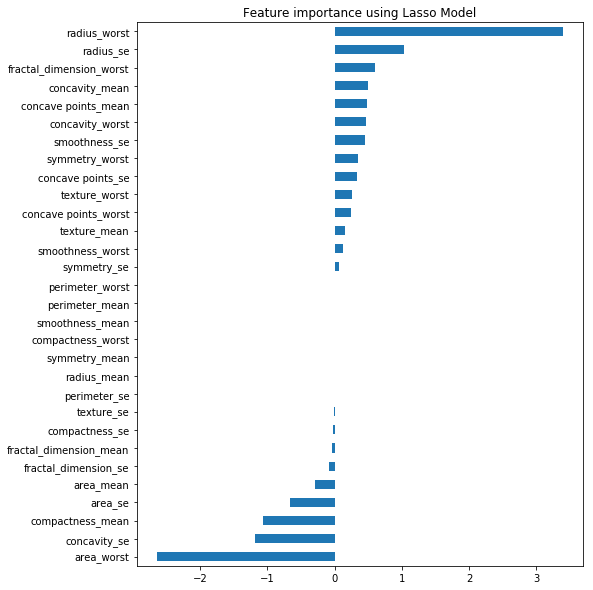

In [530]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
cols_picked_lasso = ['radius_worst', 'radius_se', 'fractal_dimension_worst', 'concavity_mean', 
                     'concave points_mean', 'concavity_worst', 'smoothness_se', 'symmetry_worst',
                     'concave points_se', 'texture_worst', 'concave points_worst', 'texture_mean',
                     'smoothness_worst', 'symmetry_se', 'texture_se', 'compactness_se', 
                     'fractal_dimension_mean', 'fractal_dimension_se','area_mean', 'area_se', 
                     'compactness_mean', 'concavity_se', 'area_worst']

In [47]:
cols = list(breast_cancer_norm.columns)
cols.remove('diagnosis')
train_X = train[cols]
train_y = train.diagnosis
test_X = test[cols]
test_y = test.diagnosis

prediction_var = ['perimeter_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']  
train_filtered_X = train[prediction_var]
train_filtered_y= train.diagnosis
test_filtered_X= test[prediction_var] 
test_filtered_y = test.diagnosis

pca_6 = ['Component_1','Component_2','Component_3','Component_4','Component_5','Component_6']
train_pca_6_X = train_pca_6[pca_6]
train_pca_6_y = train_pca_6.diagnosis
test_pca_6_X = test_pca_6[pca_6]
test_pca_6_y = test_pca_6.diagnosis

pca_3 = ['component_1','component_2','component_3']
train_pca_3_X = train_pca_3[pca_3]
train_pca_3_y = train_pca_3.diagnosis
test_pca_3_X = test_pca_3[pca_3]
test_pca_3_y = test_pca_3.diagnosis

Accuracy Score
0.976608187135
Confusion Matrix
[[111   4]
 [  0  56]]


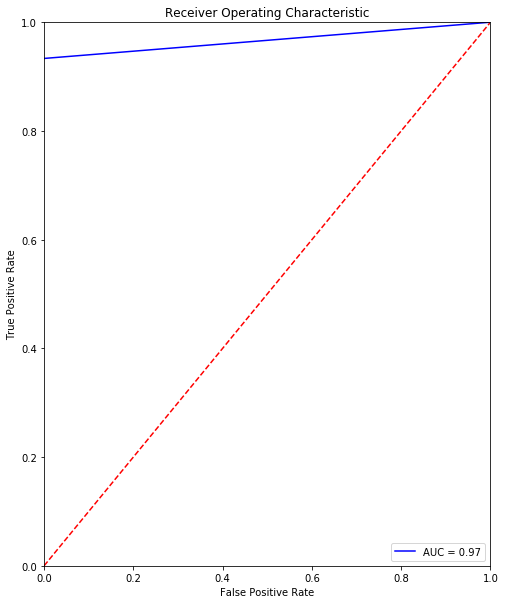

In [732]:
# Random Forest - All 30 features
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(train_X,train_y)
rf_pred=rf_model.predict(test_X)
print("Accuracy Score")
print(metrics.accuracy_score(rf_pred,test_y))
print("Confusion Matrix")
print(confusion_matrix(rf_pred, test_y))

import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_y, rf_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [750]:
feature_importance = pd.Series(dt_model.feature_importances_, index=cols).sort_values(ascending=False)
print(feature_importance)

area_worst                 0.702488
concave points_worst       0.163843
texture_mean               0.055671
concavity_mean             0.030878
radius_se                  0.020732
area_se                    0.009979
concave points_se          0.009313
concavity_se               0.007096
symmetry_mean              0.000000
fractal_dimension_mean     0.000000
fractal_dimension_worst    0.000000
concave points_mean        0.000000
texture_se                 0.000000
smoothness_mean            0.000000
area_mean                  0.000000
perimeter_mean             0.000000
compactness_mean           0.000000
smoothness_se              0.000000
perimeter_se               0.000000
symmetry_worst             0.000000
compactness_se             0.000000
symmetry_se                0.000000
fractal_dimension_se       0.000000
radius_worst               0.000000
texture_worst              0.000000
perimeter_worst            0.000000
smoothness_worst           0.000000
compactness_worst          0

Accuracy Score
0.964912280702
Confusion Matrix
[[110   5]
 [  1  55]]


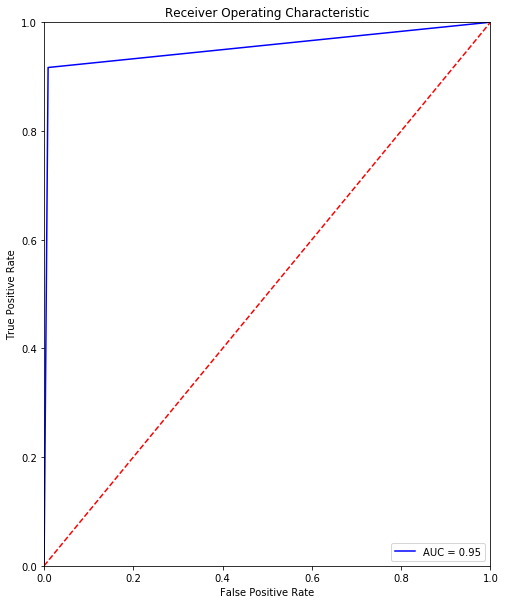

In [735]:
# Random Forest - Filtered Features
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(train_filtered_X,train_filtered_y)
rf_pred=rf_model.predict(test_filtered_X)
print("Accuracy Score")
print(metrics.accuracy_score(rf_pred,test_filtered_y))
print("Confusion Matrix")
print(confusion_matrix(rf_pred, test_filtered_y))

import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_filtered_y, rf_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [740]:
feature_importance = pd.Series(rf_model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(feature_importance)

perimeter_mean          0.269101
compactness_mean        0.222803
concavity_mean          0.169250
concave points_mean     0.112360
radius_se               0.078914
compactness_worst       0.056874
perimeter_worst         0.044350
concave points_worst    0.023291
concavity_worst         0.023058
dtype: float64


Accuracy Score
0.9532163742690059
Confusion Matrix
[[105   3]
 [  5  58]]


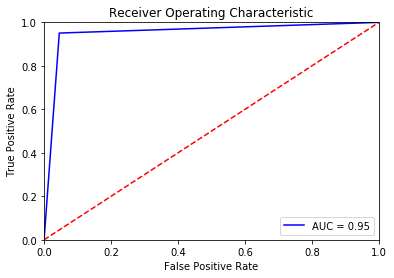

In [50]:
# Random Forest - PCA 6
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(train_pca_6_X,train_pca_6_y)
rf_pred=rf_model.predict(test_pca_6_X)
print("Accuracy Score")
print(metrics.accuracy_score(rf_pred,test_pca_6_y))
print("Confusion Matrix")
print(confusion_matrix(rf_pred, test_pca_6_y))

import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_pca_6_y, rf_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [746]:
feature_importance = pd.Series(rf_model.feature_importances_, index=pca_6).sort_values(ascending=False)
print(feature_importance)

Component_1    0.640031
Component_3    0.105073
Component_2    0.103802
Component_5    0.053000
Component_4    0.051888
Component_6    0.046206
dtype: float64


Accuracy Score
0.947368421053
Confusion Matrix
[[107   5]
 [  4  55]]


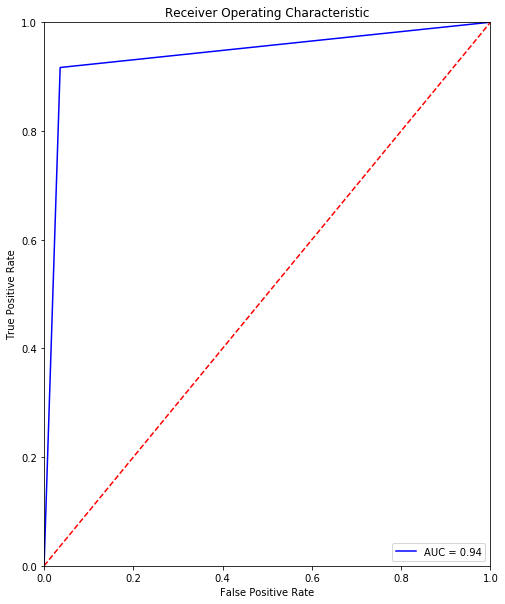

In [742]:
# Random Forest - PCA 3
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(train_pca_3_X,train_pca_3_y)
rf_pred=rf_model.predict(test_pca_3_X)
print("Accuracy Score")
print(metrics.accuracy_score(rf_pred,test_pca_3_y))
print("Confusion Matrix")
print(confusion_matrix(rf_pred, test_pca_3_y))

import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_pca_3_y, rf_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [743]:
feature_importance = pd.Series(rf_model.feature_importances_, index=pca_3).sort_values(ascending=False)
print(feature_importance)

component_1    0.622702
component_2    0.208054
component_3    0.169244
dtype: float64


Accuracy score
0.929824561404
Confusion matrix
[[103   4]
 [  8  56]]


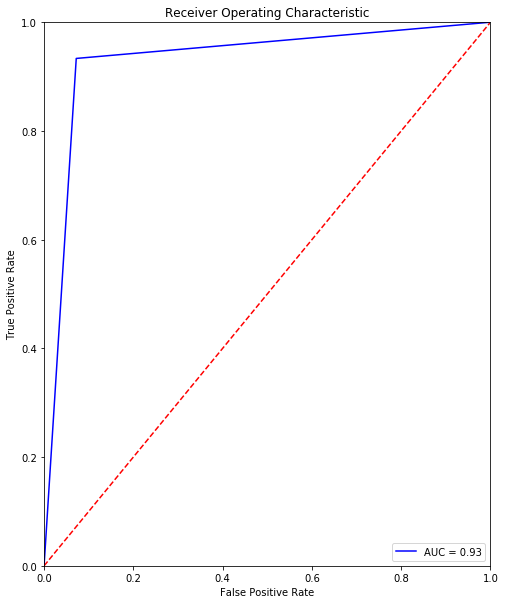

In [748]:
# Decision tree - All 30 features
dt_model = DecisionTreeClassifier()
dt_model.fit(train_X,train_y)
df_pred=dt_model.predict(test_X)
print("Accuracy score")
print(metrics.accuracy_score(df_pred,test_y))
print("Confusion matrix")
print(confusion_matrix(df_pred, test_y))

fpr, tpr, threshold = metrics.roc_curve(test_y, df_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [749]:
feature_importance = pd.Series(dt_model.feature_importances_, index=cols).sort_values(ascending=False)
print(feature_importance)

area_worst                 0.702488
concave points_worst       0.163843
texture_mean               0.055671
concavity_mean             0.030878
radius_se                  0.020732
area_se                    0.009979
concave points_se          0.009313
concavity_se               0.007096
symmetry_mean              0.000000
fractal_dimension_mean     0.000000
fractal_dimension_worst    0.000000
concave points_mean        0.000000
texture_se                 0.000000
smoothness_mean            0.000000
area_mean                  0.000000
perimeter_mean             0.000000
compactness_mean           0.000000
smoothness_se              0.000000
perimeter_se               0.000000
symmetry_worst             0.000000
compactness_se             0.000000
symmetry_se                0.000000
fractal_dimension_se       0.000000
radius_worst               0.000000
texture_worst              0.000000
perimeter_worst            0.000000
smoothness_worst           0.000000
compactness_worst          0

Accuracy score
0.894736842105
Confusion matrix
[[101   8]
 [ 10  52]]


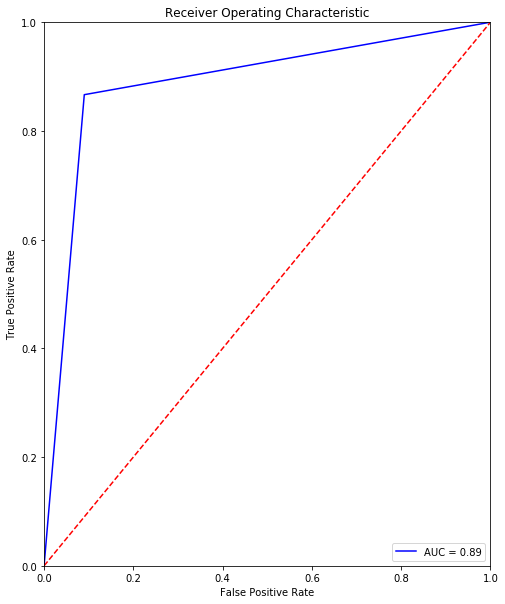

In [751]:
# Decision Tree - Filtered features

dt_model = DecisionTreeClassifier()
dt_model.fit(train_filtered_X,train_filtered_y)
df_pred=dt_model.predict(test_filtered_X)
print("Accuracy score")
print(metrics.accuracy_score(df_pred,test_filtered_y))
print("Confusion matrix")
print(confusion_matrix(df_pred, test_filtered_y))

fpr, tpr, threshold = metrics.roc_curve(test_filtered_y, df_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score
0.918128654971
Confusion matrix
[[93 13]
 [ 1 64]]


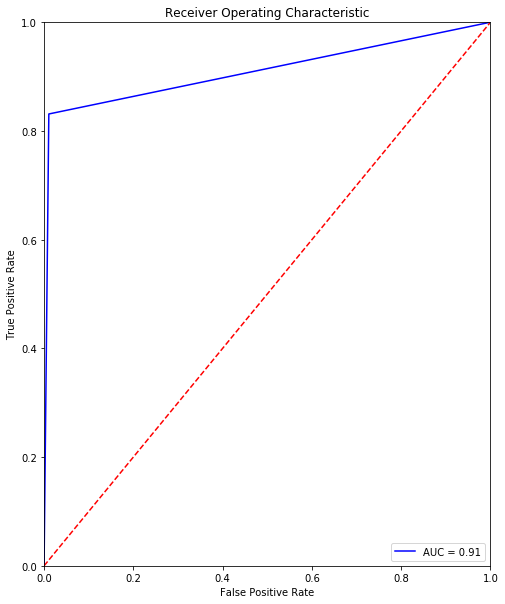

In [752]:
# Decision Tree - PCA 6

dt_model = DecisionTreeClassifier()
dt_model.fit(train_pca_6_X,train_pca_6_y)
df_pred=dt_model.predict(test_pca_6_X)
print("Accuracy score")
print(metrics.accuracy_score(df_pred,test_pca_6_y))
print("Confusion matrix")
print(confusion_matrix(df_pred, test_pca_6_y))

fpr, tpr, threshold = metrics.roc_curve(test_pca_6_y, df_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score
0.9239766081871345
Confusion matrix
[[113  12]
 [  1  45]]


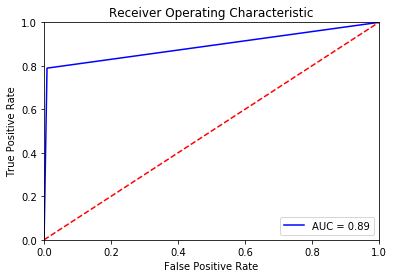

In [52]:
# Decision Tree - PCA 3

dt_model = DecisionTreeClassifier()
dt_model.fit(train_pca_3_X,train_pca_3_y)
df_pred=dt_model.predict(test_pca_3_X)
print("Accuracy score")
print(metrics.accuracy_score(df_pred,test_pca_3_y))
print("Confusion matrix")
print(confusion_matrix(df_pred, test_pca_3_y))

fpr, tpr, threshold = metrics.roc_curve(test_pca_3_y, df_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy Score
0.9532163742690059
Confusion matrix
[[103   8]
 [  0  60]]


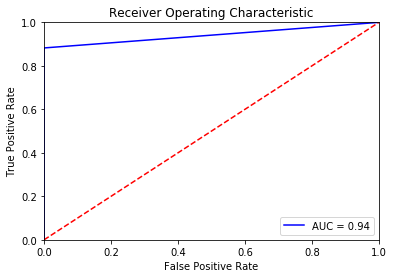

In [54]:
# Logistic regression - All 30 features

warnings.filterwarnings("ignore", category=FutureWarning)

lr_model = LogisticRegression(C = 0.1, penalty = 'l2')
lr_model.fit(train_X, train_y)
lr_pred = lr_model.predict(test_X)
print("Accuracy Score")
print(metrics.accuracy_score(lr_pred, test_y))
print("Confusion matrix")
print(confusion_matrix(lr_pred, test_y))

fpr, tpr, threshold = metrics.roc_curve(test_y, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [763]:
# Recursive feature elimination

nof_list=np.arange(1,len(cols))           
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression(C = 0.1, penalty = 'l2')
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(train_X,train_y)
    X_test_rfe = rfe.transform(test_X)
    model.fit(X_train_rfe,train_y)
    score = model.score(X_test_rfe,test_y)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.941520


In [764]:
#Initializing RFE model
rfe = RFE(model, 10)          
#Transforming data using RFE
X_rfe = rfe.fit_transform(breast_cancer_norm[cols],breast_cancer_norm.diagnosis)  
#Fitting the data to model
model.fit(X_rfe,breast_cancer_norm.diagnosis)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'fractal_dimension_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


Accuracy score
0.941520467836
Confusion matrix
[[111  10]
 [  0  50]]


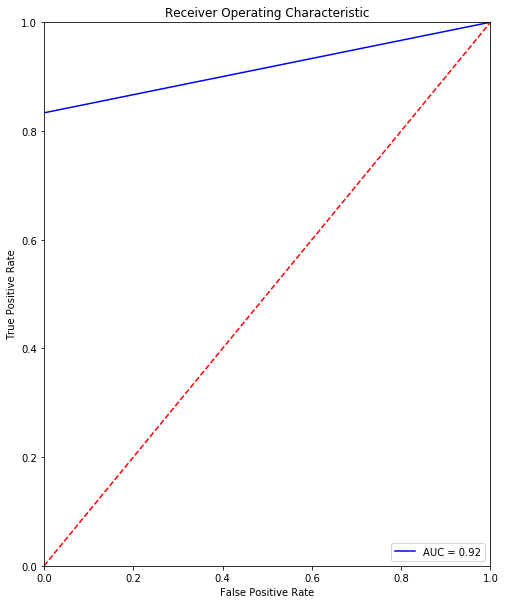

In [771]:
# Logistic regression - Recursive feature elimination

RFE_var = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'fractal_dimension_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst']
train_RFE_X = train[RFE_var]
train_RFE_y= train.diagnosis
test_RFE_X= test[RFE_var] 
test_RFE_y = test.diagnosis

warnings.filterwarnings("ignore", category=FutureWarning)

lr_model = LogisticRegression(C = 0.1, penalty = 'l2')
lr_model.fit(train_RFE_X, train_RFE_y)
lr_pred = lr_model.predict(test_RFE_X)
print("Accuracy score")
print(metrics.accuracy_score(lr_pred, test_RFE_y))
print("Confusion matrix")
print(confusion_matrix(lr_pred, test_RFE_y))

fpr, tpr, threshold = metrics.roc_curve(test_RFE_y, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy Score
0.923976608187
Confusion matrix
[[108  10]
 [  3  50]]


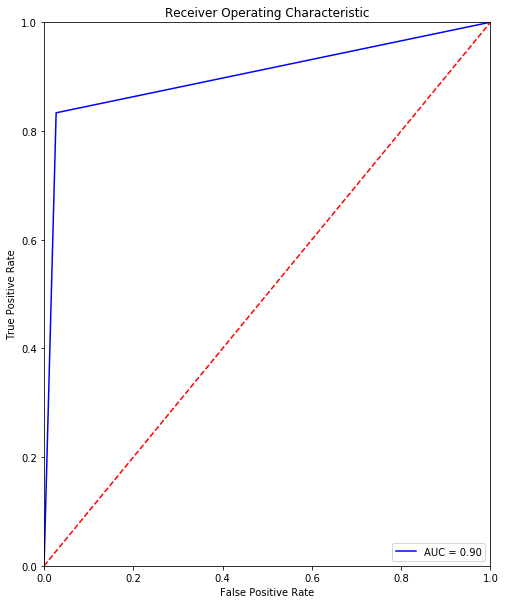

In [760]:
# Logistic regression - Filtered features

warnings.filterwarnings("ignore", category=FutureWarning)

lr_model = LogisticRegression(C = 0.1, penalty = 'l2')
lr_model.fit(train_filtered_X, train_filtered_y)
lr_pred = lr_model.predict(test_filtered_X)
print("Accuracy Score")
print(metrics.accuracy_score(lr_pred, test_filtered_y))
print("Confusion matrix")
print(confusion_matrix(lr_pred, test_filtered_y))

fpr, tpr, threshold = metrics.roc_curve(test_filtered_y, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy Score
0.9766081871345029
Confusion matrix
[[108   2]
 [  2  59]]


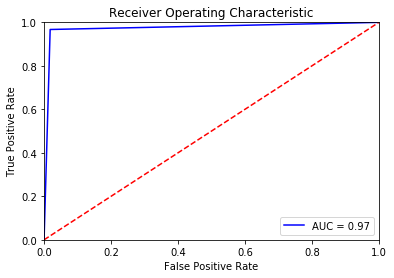

In [51]:
# Logistic regression - PCA 6

warnings.filterwarnings("ignore", category=FutureWarning)

lr_model = LogisticRegression(C = 0.1, penalty = 'l2')
lr_model.fit(train_pca_6_X, train_pca_6_y)
lr_pred = lr_model.predict(test_pca_6_X)
print("Accuracy Score")
print(metrics.accuracy_score(lr_pred, test_pca_6_y))
print("Confusion matrix")
print(confusion_matrix(lr_pred, test_pca_6_y))

fpr, tpr, threshold = metrics.roc_curve(test_pca_6_y, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy Score
0.959064327485
Confusion matrix
[[107   3]
 [  4  57]]


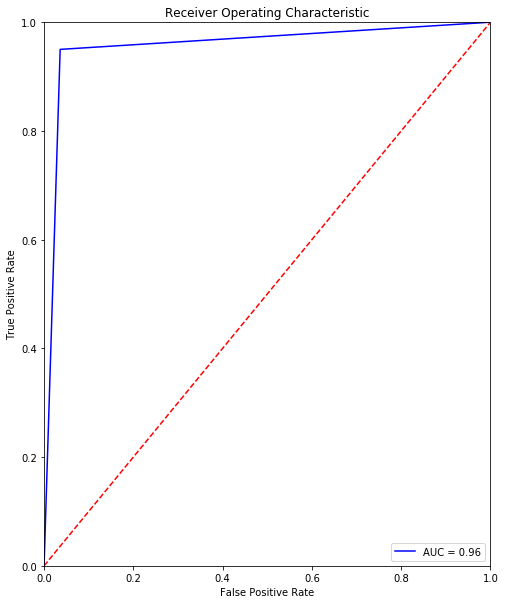

In [762]:
# Logistic regression - PCA 3

warnings.filterwarnings("ignore", category=FutureWarning)

lr_model = LogisticRegression(C = 0.1, penalty = 'l2')
lr_model.fit(train_pca_3_X, train_pca_3_y)
lr_pred = lr_model.predict(test_pca_3_X)
print("Accuracy Score")
print(metrics.accuracy_score(lr_pred, test_pca_3_y))
print("Confusion matrix")
print(confusion_matrix(lr_pred, test_pca_3_y))

fpr, tpr, threshold = metrics.roc_curve(test_pca_3_y, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

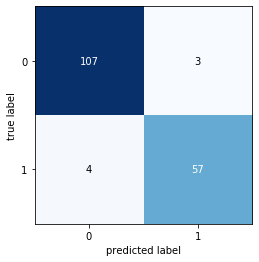

In [18]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_cm(cm):
    binary = np.array(cm)

    fig, ax = plot_confusion_matrix(conf_mat=binary)
    plt.show()

cm = [[107,3],[4,57]]

plot_cm(cm)

In [ ]:
rf_acc = [0.9766,0.9649,0.9415,0.9474]
rf_prec = [0.9333,0.9167,0.8961,0.9167]
rf_recall = [1,0.9821,0.9718,0.9322]

x_axis = ["All","Filtered","PCA-6","PCA-3"]

plt.plot(x_axis, rf_acc, color='red', label="accuracy", marker='o')
plt.plot(x_axis, rf_prec, color='green', label="precision",marker='o')
plt.plot(x_axis, rf_recall, color='blue', label="recall",marker='o')
plt.xlabel('Model Optimization')
plt.legend()
plt.title('Random Forest Model Comparisons')
plt.show()

In [ ]:
models_metrics = {'Log. Regression': [0.9649, 0.9221, 1], 
                 'Decision Tree': [0.9298, 0.9167, 0.8871],
                 'Random Forest' : [0.9766, 0.9333, 1]
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.50, 1.1), 
        color = ['red','blue','green'],
        rot = 0, title ='Model Performance',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()